In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

In [113]:
X = pd.read_csv("pima-indians-diabetes-features.csv")
y = pd.read_csv("pima-indians-diabetes-target.csv")

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = RandomForestClassifier()

In [116]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [117]:
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=3)

In [118]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [119]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)

In [120]:
y_pred = best_model.predict(X_test)

In [121]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[79 20]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



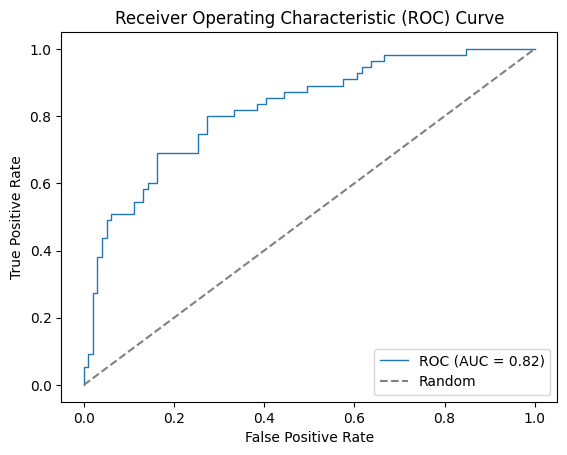

In [122]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


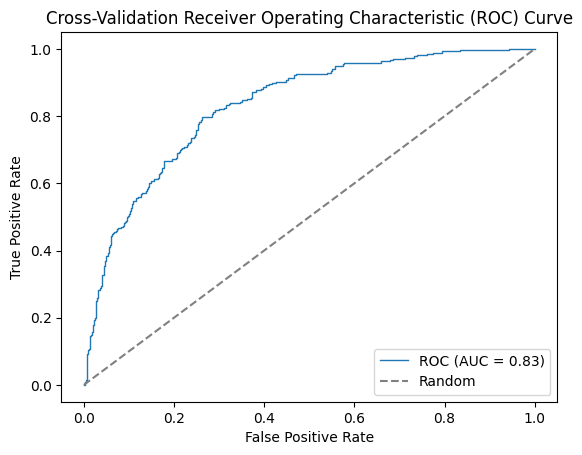

In [123]:
cv_scores = cross_val_score(best_model, X, y.values.ravel(), cv=5)
y_pred_cv = cross_val_predict(best_model, X, y.values.ravel(), cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y.values.ravel(), y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)
plt.plot(fpr_cv, tpr_cv, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc_cv))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [124]:
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation scores: ", np.std(cv_scores))

Cross-validation scores:  [0.76623377 0.72077922 0.75324675 0.83006536 0.77777778]
Mean cross-validation score:  0.7696205755029284
Standard deviation of cross-validation scores:  0.03573559100445814
